# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from importlib import reload

# Data loading

In [2]:
data = pd.read_csv('loan.csv')
data.shape

(39717, 111)

# Data validation

#### 1. Validate header
We can see that there is **no extra header** present in the data, so it is already **valid.**

In [3]:
data.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#### 2. Validate footer
We can see that there is **no extra footer** present in the data, so it is already **valid.**

In [4]:
data.tail(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 3. Validate duplicate rows
We can see that there is **no duplicate rows** are present in the data and hence it is already **valid.**

In [5]:
data[data.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


# Data cleaning

#### 1. Fix columns
###### 1.1 Find all the columns where more than 50% records are empty

In [6]:
colms_with_more_than_half_nulls = data.columns[data.isnull().mean()*100 > 50]
round(data[colms_with_more_than_half_nulls].isnull().mean()*100, 2)

mths_since_last_delinq             64.66
mths_since_last_record             92.99
next_pymnt_d                       97.13
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m                       100.00
open_rv_24m                       100.00
max_bal_bc                        100.00
all_util                          100.00
total_rev_hi_lim                  100.00
inq_fi                            100.00
total_cu_tl                       100.00
inq_last_12m                      100.00
acc_open_past_24

##### 1.2 Delete all the columns where more than 50% records are empty

In [7]:
data = data.drop(columns = colms_with_more_than_half_nulls, axis = 1)

In [8]:
data.shape

(39717, 54)

##### 1.3 Delete Unnecessary columns

In [9]:
descriptive_cols = ['desc', 'url', 'emp_title', 'title', 'id', 'member_id']
data = data.drop(columns = descriptive_cols, axis = 1)

single_val_cols = ['application_type', 'pymnt_plan', 'initial_list_status', 'tax_liens', 'chargeoff_within_12_mths', 
                   'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'delinq_amnt']
data = data.drop(columns = single_val_cols, axis = 1)

redundant_cols = ['zip_code', 'sub_grade']
data = data.drop(columns=redundant_cols, axis = 1)

behavioural_cols = ['delinq_2yrs', 'earliest_cr_line', 'last_pymnt_amnt','inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 
                    'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt','total_pymnt_inv', 'total_rec_prncp',
                    'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
                    'last_credit_pull_d']
data = data.drop(columns=behavioural_cols, axis = 1)

In [10]:
data.shape

(39717, 18)

#### 2. Fix rows
##### 2.1 Find number of missing values rows in the null columns

In [11]:
data[data.columns[data.isnull().any()]].isnull().sum()

emp_length              1075
pub_rec_bankruptcies     697
dtype: int64

#### *2.2 Delete all the rows with null values*

In [12]:
data = data[(~data['emp_length'].isnull()) & (~data['pub_rec_bankruptcies'].isnull())]

#### *2.3 Delete all the rows with loan status = 'current'*
Delete loans with status 'Current' as we cannot understand charge-off trend from the people who are currently paying thier loan.

In [13]:
data= data[data['loan_status']!='Current']

#### 3. Standardise values
#### 3.1 Outliers removal
Let us analyse the **annual income** column

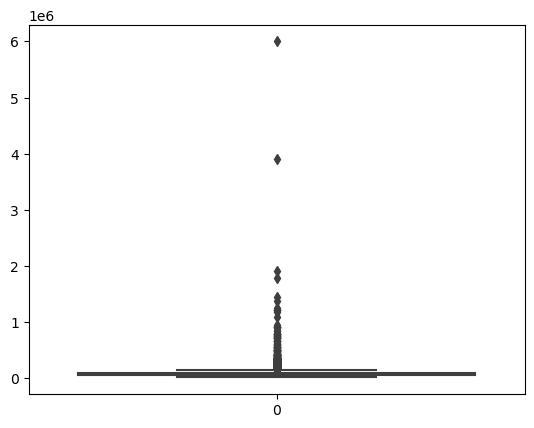

count    3.684700e+04
mean     6.940448e+04
std      6.402747e+04
min      4.000000e+03
25%      4.100400e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [14]:
sns.boxplot(data['annual_inc'])
plt.show()
data['annual_inc'].describe()

From above column description we can see that the mean & median are of 10^4 order and max is of 10^6 order. Hence there are outliers
present in this column. Let us remove those outliers.

In [15]:
data = data[data['annual_inc'] < data['annual_inc'].quantile(0.98)] # remove outliers
data['annual_inc'].describe()

count     36110.000000
mean      64537.519321
std       32265.998060
min        4000.000000
25%       40800.000000
50%       58163.500000
75%       80000.000000
max      188004.000000
Name: annual_inc, dtype: float64

After removing outliers our **annual income** column is looking fine.

#### 3.2 Fix values and datatypes

#### 3.2.1 On interest rate column
Let us analyse interest rate column

In [16]:
print(data['int_rate'].head(2))
data['int_rate'].info()

0    10.65%
1    15.27%
Name: int_rate, dtype: object
<class 'pandas.core.series.Series'>
Index: 36110 entries, 0 to 39680
Series name: int_rate
Non-Null Count  Dtype 
--------------  ----- 
36110 non-null  object
dtypes: object(1)
memory usage: 564.2+ KB


We have to modify the data type of this column from object to float and remove the % from the end, to consider this column as a
quantitive variable during our analysis.

In [17]:
data['int_rate'] = data['int_rate'].apply(lambda x: x[0:-1])
data['int_rate'] = data['int_rate'].astype('float64')

In [18]:
print(data['int_rate'].head(2))
data['int_rate'].info()

0    10.65
1    15.27
Name: int_rate, dtype: float64
<class 'pandas.core.series.Series'>
Index: 36110 entries, 0 to 39680
Series name: int_rate
Non-Null Count  Dtype  
--------------  -----  
36110 non-null  float64
dtypes: float64(1)
memory usage: 564.2 KB


In [19]:
data.shape

(36110, 18)

# Univariate analysis on categorical variables

Let us club all the categorical and numerical columns together, then we have lists like follows:

In [20]:
categorical_columns = ['loan_status', 'purpose', 'term', 'emp_length', 'home_ownership', 'verification_status', 'addr_state', 
                       'grade', 'pub_rec_bankruptcies', 'inc_cat']

numeric_columns = ['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc', 'revol_bal', 'dti']

#### 1. Analysis on Loan Status
Below pie chart shows that **85.58%** of the loan applications status are **'Fully Paid'** and only **14.42%** applications are **'Charged Off'**.

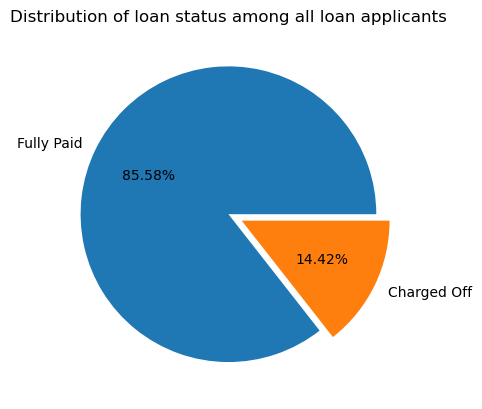

In [21]:
plt = reload(plt)
plt.pie(x = data['loan_status'].value_counts()*100 / len(data['loan_status']), autopct='%.2f%%', 
        labels=data['loan_status'].value_counts().index, explode = [0, 0.1])
plt.title('Distribution of loan status among all loan applicants')
plt.show()

#### 2. Analysis on Loan Purpose
Below barchart shows that most of the loan applicants(16K+) have loan purpose of **debt consolidators**.

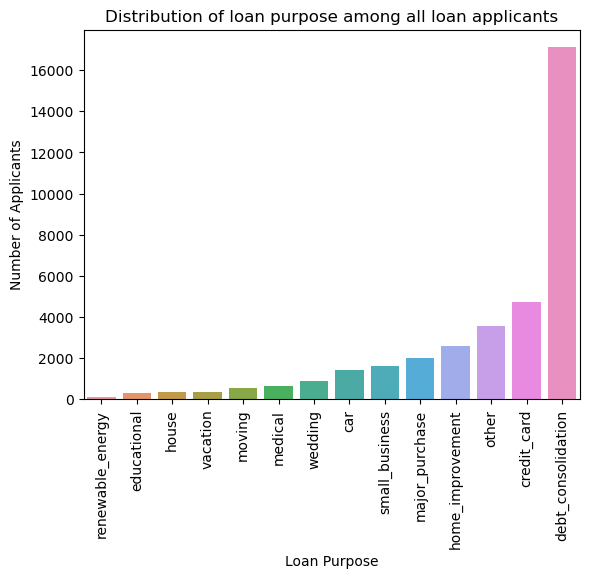

In [22]:
plt = reload(plt)
sns.barplot(y = data['purpose'].value_counts(ascending=True), x = data['purpose'].value_counts(ascending=True).index)
plt.xticks(rotation = 90)
plt.title('Distribution of loan purpose among all loan applicants')
plt.xlabel('Loan Purpose')
plt.ylabel('Number of Applicants')
plt.show()

#### 3. Analysis on Loan Term
Below pie chart shows that arround **75%** of loan applicants chhose the **36 months** term plan while only **25%** choose **60 months** term plan.

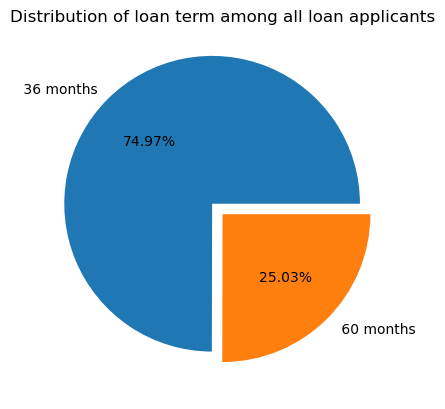

In [23]:
plt = reload(plt)
plt.pie(x = data['term'].value_counts()*100 / len(data['term']), autopct='%.2f%%', labels=data['term'].value_counts().index, 
        explode = [0.1, 0])
plt.title('Distribution of loan term among all loan applicants')
plt.show()

#### 4. Analysis on Employment Length
Below pie chart shows that the **majority(~8K)** of the loan appliers having **10+ years** of service length.

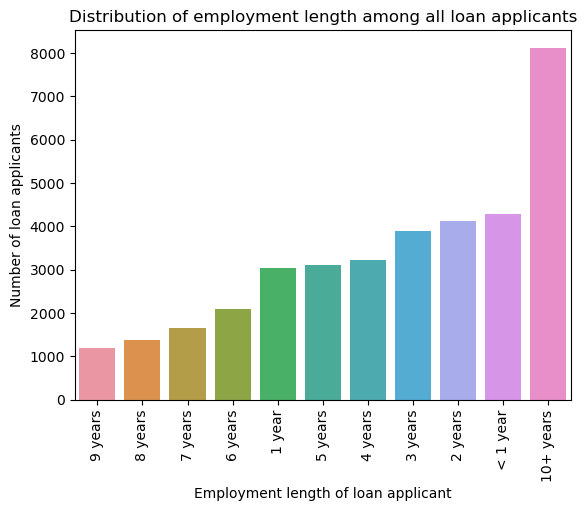

In [24]:
plt = reload(plt)
sns.barplot(x = data['emp_length'].value_counts(ascending=True).index, y = data['emp_length'].value_counts(ascending=True))
plt.xticks(rotation = 90)
plt.xlabel('Employment length of loan applicant')
plt.ylabel('Number of loan applicants')
plt.title('Distribution of employment length among all loan applicants')
plt.show()

#### 5. Analysis on House Ownership
Below barchart shows that **majority** of the loan applicants are either resides in **rented house** or they **mortgage their houses**.

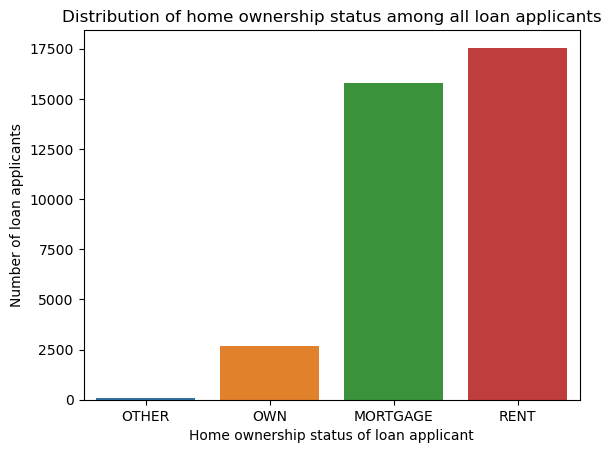

In [25]:
plt = reload(plt)
sns.barplot(x = data['home_ownership'].value_counts(ascending=True).index, 
            y = data['home_ownership'].value_counts(ascending=True))
plt.xlabel('Home ownership status of loan applicant')
plt.ylabel('Number of loan applicants')
plt.title('Distribution of home ownership status among all loan applicants')
plt.show()

#### 6. Analysis on Verification Status
Below pie chart shows that **42.76%** people's income are **not verified** by LC.

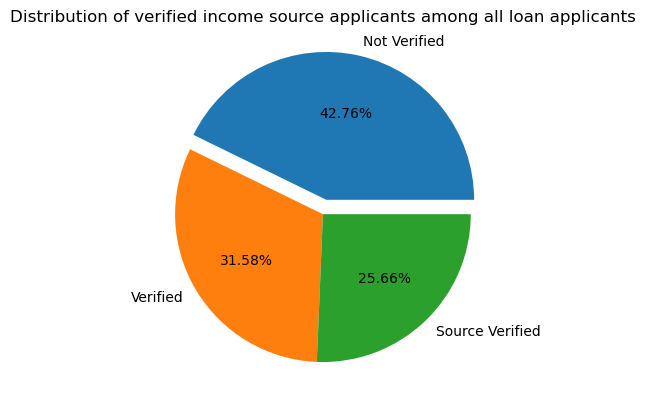

In [26]:
plt = reload(plt)
plt.pie(x = data['verification_status'].value_counts()*100 / len(data['verification_status']), autopct='%.2f%%', 
        labels=data['verification_status'].value_counts().index, explode = [0.1, 0, 0])
plt.title('Distribution of verified income source applicants among all loan applicants')
plt.show()

#### 7. Analysis on State
Below bar chart shows that **state CA** has **highest** loan applications (6K+).

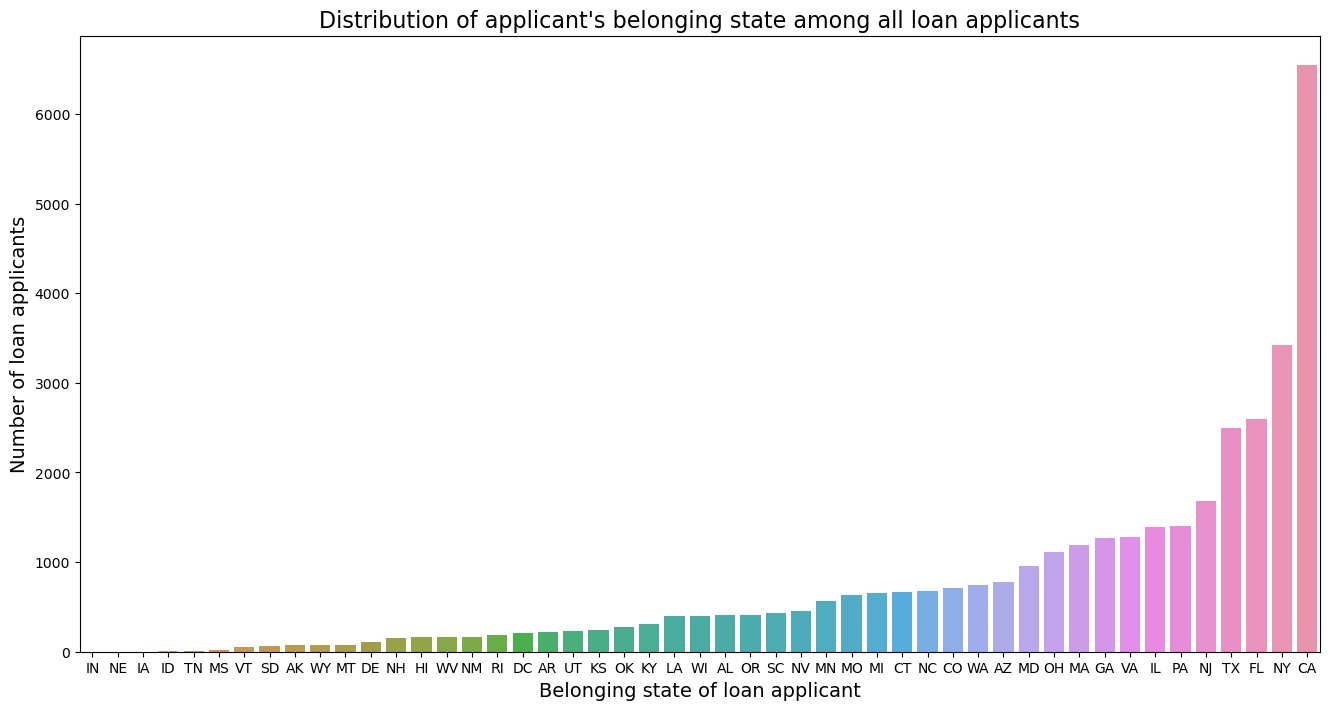

In [27]:
plt = reload(plt)
plt.figure(figsize = (16, 8))
sns.barplot(x = data['addr_state'].value_counts(ascending=True).index, y = data['addr_state'].value_counts(ascending=True))
plt.xlabel('Belonging state of loan applicant', fontsize=14)
plt.ylabel('Number of loan applicants', fontsize=14)
plt.title("Distribution of applicant's belonging state among all loan applicants", fontsize=16)
plt.show()

#### 8. Analysis on Grade
LC assigns **A and B grade** to mostly applicants.

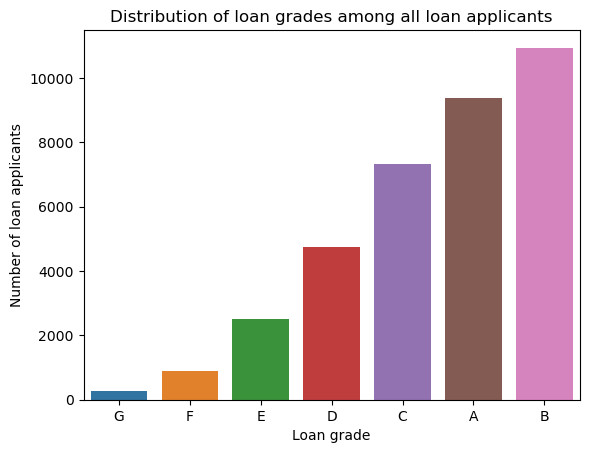

In [28]:
plt = reload(plt)
sns.barplot(x = data['grade'].value_counts(ascending=True).index, y = data['grade'].value_counts(ascending=True))
plt.xlabel('Loan grade')
plt.ylabel('Number of loan applicants')
plt.title("Distribution of loan grades among all loan applicants")
plt.show()

#### 9. Analysis on Public Record Bankruptcies
Very few applicants are officially bankrupt.

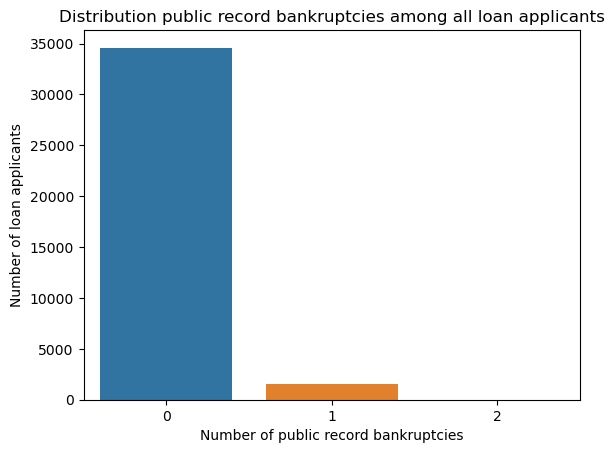

In [29]:
plt = reload(plt)
data['pub_rec_bankruptcies'] = data['pub_rec_bankruptcies'].astype('int32')
sns.barplot(x = data['pub_rec_bankruptcies'].value_counts(ascending=True).index, 
            y = data['pub_rec_bankruptcies'].value_counts(ascending=True))
plt.xlabel('Number of public record bankruptcies')
plt.ylabel('Number of loan applicants')
plt.title("Distribution public record bankruptcies among all loan applicants")
plt.show()

# Univariate analysis on quantitive variables

#### 1. Analysis on Loan Amount
Below plots are showing that the most of the loan applicants are applying for the **amount range between 5000 rs to 15000 rs.**

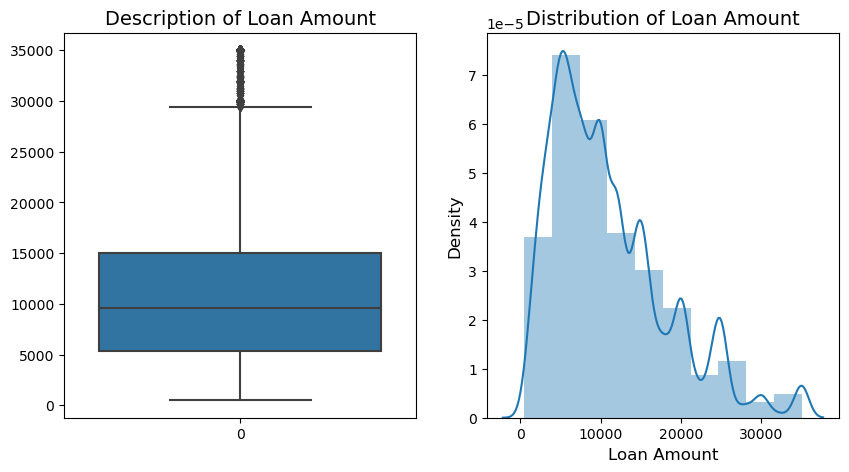

In [30]:
plt = reload(plt)
plt.figure(figsize = (10, 5))

plt.subplot(1,2,1)
ax = sns.boxplot(data['loan_amnt'])
ax.set_title('Description of Loan Amount', fontsize=14)

plt.subplot(1,2,2)
ax = sns.distplot(data['loan_amnt'], bins=10)
ax.set_title('Distribution of Loan Amount', fontsize=14)
ax.set_ylabel('Density', fontsize = 12)
ax.set_xlabel('Loan Amount', fontsize = 12)

plt.show()

#### 2. Analysis on Funded Amount
Below plots are showing that the bank is funding the most of the loan applicants **amount range between 5000 rs to 15000 rs.**

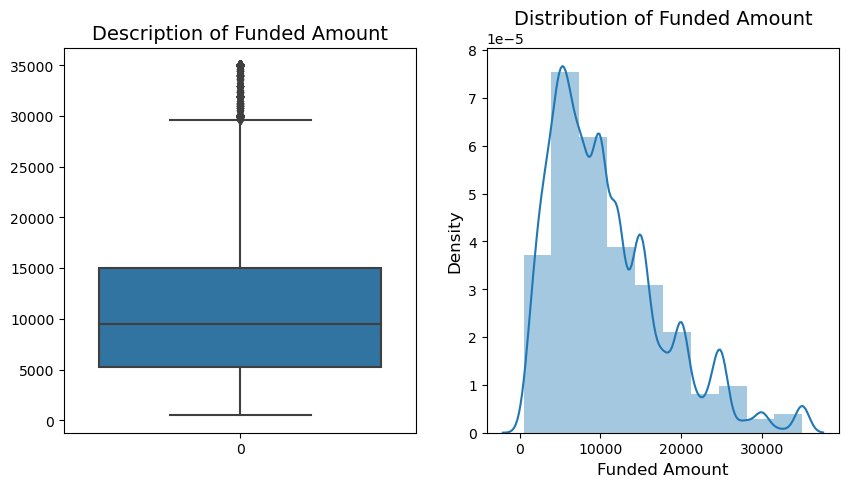

In [31]:
plt = reload(plt)
plt.figure(figsize = (10, 5))

plt.subplot(1,2,1)
ax = sns.boxplot(data['funded_amnt'])
ax.set_title('Description of Funded Amount', fontsize=14)

plt.subplot(1,2,2)
ax = sns.distplot(data['funded_amnt'], bins=10)
ax.set_title('Distribution of Funded Amount', fontsize=14)
ax.set_ylabel('Density', fontsize = 12)
ax.set_xlabel('Funded Amount', fontsize = 12)

plt.show()

#### 3. Analysis on Interest Rate
Below plots are showing that the bank is providing the loan with **interest rate between 8% to 15%** to most of the loan applicants.

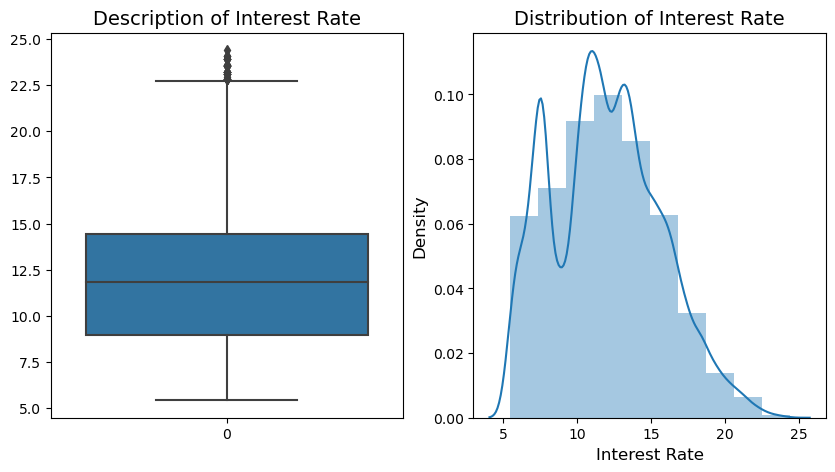

In [32]:
plt = reload(plt)
plt.figure(figsize = (10, 5))

plt.subplot(1,2,1)
ax = sns.boxplot(data['int_rate'])
ax.set_title('Description of Interest Rate', fontsize=14)

plt.subplot(1,2,2)
ax = sns.distplot(data['int_rate'], bins=10)
ax.set_title('Distribution of Interest Rate', fontsize=14)
ax.set_ylabel('Density', fontsize = 12)
ax.set_xlabel('Interest Rate', fontsize = 12)

plt.show()

#### 4. Analysis on Monthly Installments
Below plots are showing that the loan applicants are giving **190 rs to 400 rs monthly installemnts** to replay their loan.

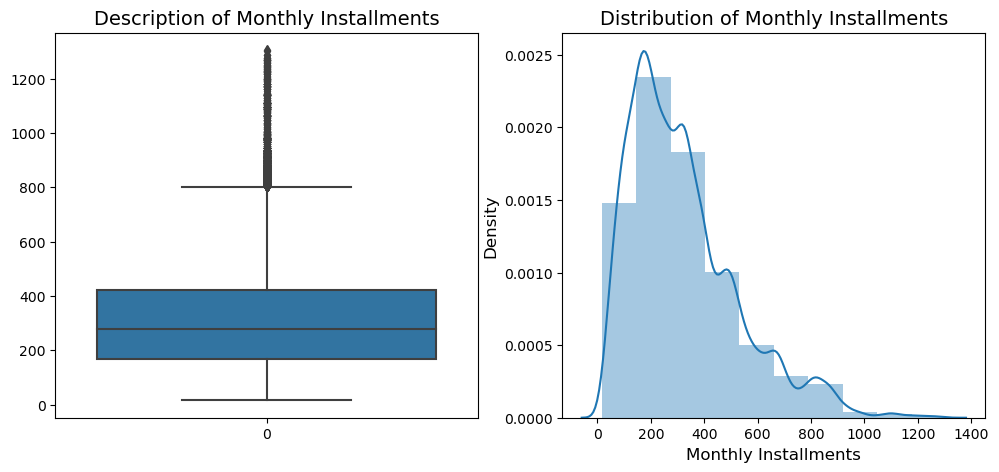

In [33]:
plt = reload(plt)
plt.figure(figsize = (12, 5))

plt.subplot(1,2,1)
ax = sns.boxplot(data['installment'])
ax.set_title('Description of Monthly Installments', fontsize=14)

plt.subplot(1,2,2)
ax = sns.distplot(data['installment'], bins=10)
ax.set_title('Distribution of Monthly Installments', fontsize=14)
ax.set_ylabel('Density', fontsize = 12)
ax.set_xlabel('Monthly Installments', fontsize = 12)

plt.show()

#### 4. Analysis on Annual Income
Below plots are showing that the loan applicants have thier **annual income in between 40,000 rs to 80,000 rs.**

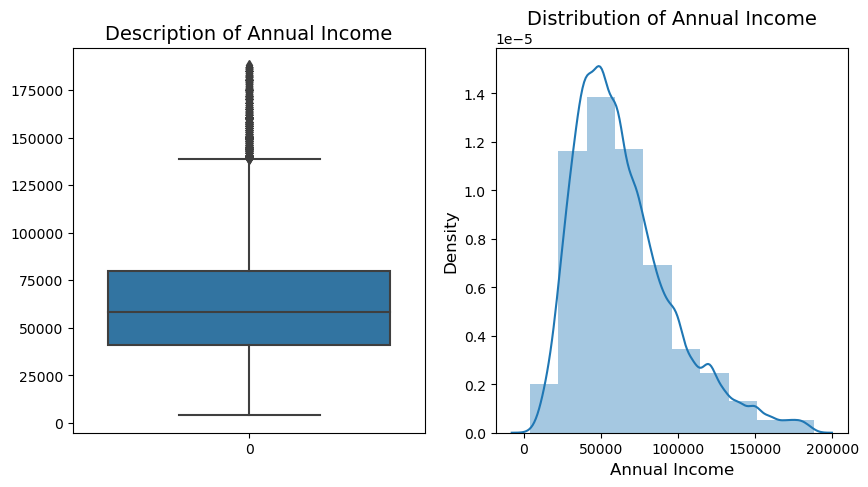

In [34]:
plt = reload(plt)
plt.figure(figsize = (10, 5))

plt.subplot(1,2,1)
ax = sns.boxplot(data['annual_inc'])
ax.set_title('Description of Annual Income', fontsize=14)

plt.subplot(1,2,2)
ax = sns.distplot(data['annual_inc'], bins=10)
ax.set_title('Distribution of Annual Income', fontsize=14)
ax.set_ylabel('Density', fontsize = 12)
ax.set_xlabel('Annual Income', fontsize = 12)

plt.show()

#### 5. Analysis on Revolving Balance
Below plots are showing that for most of the loan applicants the range of unpaid amount at the end of their billing cycle is in between **4000 rs to 17000 rs**

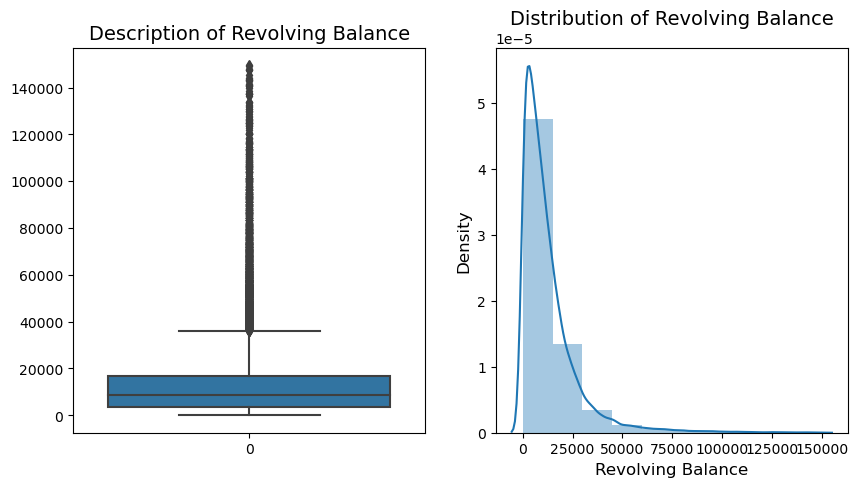

In [35]:
plt = reload(plt)
plt.figure(figsize = (10, 5))

plt.subplot(1,2,1)
ax = sns.boxplot(data['revol_bal'])
ax.set_title('Description of Revolving Balance', fontsize=14)

plt.subplot(1,2,2)
ax = sns.distplot(data['revol_bal'], bins=10)
ax.set_title('Distribution of Revolving Balance', fontsize=14)
ax.set_ylabel('Density', fontsize = 12)
ax.set_xlabel('Revolving Balance', fontsize = 12)

plt.show()

# Derived matrices

#### 1. Derive year from loan issue date

In [36]:
data['issue_year'] = (pd.to_datetime(data['issue_d'], format = '%b-%y')).dt.year

#### Loan applications over the year
Below bar chart shows that the number of loan applications are increase over the year from 2007-2011.

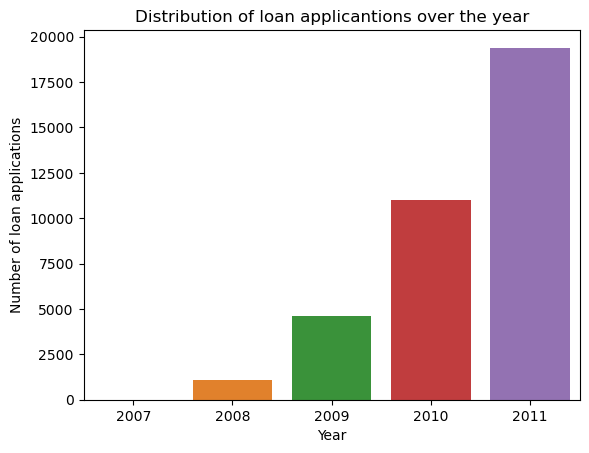

In [37]:
plt = reload(plt)

sns.barplot(y = data['issue_year'].value_counts(ascending = True), x = data['issue_year'].value_counts(ascending = True).index)
plt.xlabel('Year')
plt.ylabel('Number of loan applications')
plt.title("Distribution of loan applicantions over the year")
plt.show()

#### 2. Derive annual income categories from annual income

In [38]:
data['inc_cat'] = pd.cut(data['annual_inc'], [0, 25000, 50000, 75000, 100000, 1250000], 
                                 labels=['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 +'])

Below bar chart shows that most of the loan applicants are belong to 25,000-50,000 annual income.

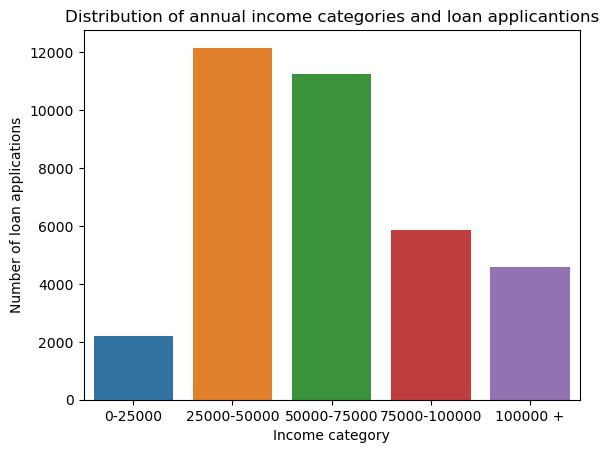

In [39]:
plt = reload(plt)

sns.barplot(y = data['inc_cat'].value_counts(ascending = True), x = data['inc_cat'].value_counts(ascending = True).index)
plt.xlabel('Income category')
plt.ylabel('Number of loan applications')
plt.title("Distribution of annual income categories and loan applicantions")
plt.show()

# Segmented analysis

#### 1. Analysis on  Annual Income Categories vs Charged Off Percentage
Below bar charts shows:
* People who earn **below 25,000** are **most likely to 'charged off'**.
* People who earn **more than 100,000** are **less likely to 'charged off'**.

In [40]:
basis_of_segmentation = ['inc_cat', 'loan_status']

df = data.groupby(by = basis_of_segmentation)['loan_status'].count().unstack().reset_index()

df['total'] = df['Charged Off']  + df['Fully Paid']
df['charged_off_per(%)'] = (df['Charged Off'] / df['total']) * 100

df

loan_status,inc_cat,Charged Off,Fully Paid,total,charged_off_per(%)
0,0-25000,410,1789,2199,18.644839
1,25000-50000,1982,10180,12162,16.296662
2,50000-75000,1610,9660,11270,14.285714
3,75000-100000,708,5173,5881,12.038769
4,100000 +,498,4100,4598,10.830796


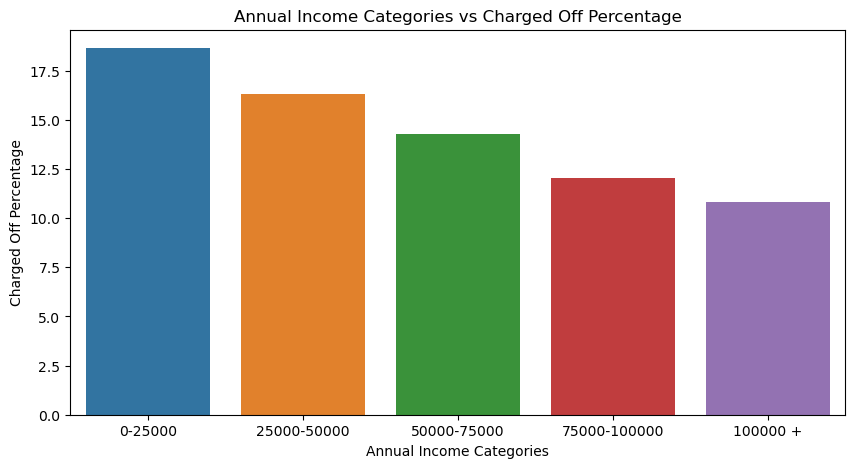

In [41]:
plt = reload(plt)

plt.figure(figsize = (10, 5))
sns.barplot(x = df['inc_cat'], y = df['charged_off_per(%)'])
plt.title('Annual Income Categories vs Charged Off Percentage')
plt.ylabel('Charged Off Percentage')
plt.xlabel('Annual Income Categories')

plt.show()

#### 2. Analysis on  Loan Purpose vs Charged Off Percentage
Below bar charts shows:
* People who are taking loan for **small business** are **most likely to 'charged off'**.
* People who are taking loan for **wedding** are **less likely to 'charged off'**.

In [42]:
basis_of_segmentation = ['purpose', 'loan_status']

df = data.groupby(by = basis_of_segmentation)['loan_status'].count().unstack().fillna(0).reset_index()

df['total'] = df['Charged Off']  + df['Fully Paid']
df['charged_off_per(%)'] = (df['Charged Off'] / df['total']) * 100
df = df.sort_values('charged_off_per(%)', ascending=False)

df

loan_status,purpose,Charged Off,Fully Paid,total,charged_off_per(%)
11,small_business,440,1167,1607,27.380212
10,renewable_energy,17,72,89,19.101124
5,house,56,280,336,16.666667
3,educational,48,246,294,16.326531
9,other,566,2971,3537,16.002262
7,medical,100,529,629,15.898251
2,debt_consolidation,2604,14508,17112,15.217391
8,moving,79,455,534,14.794007
12,vacation,50,289,339,14.749263
4,home_improvement,310,2298,2608,11.886503


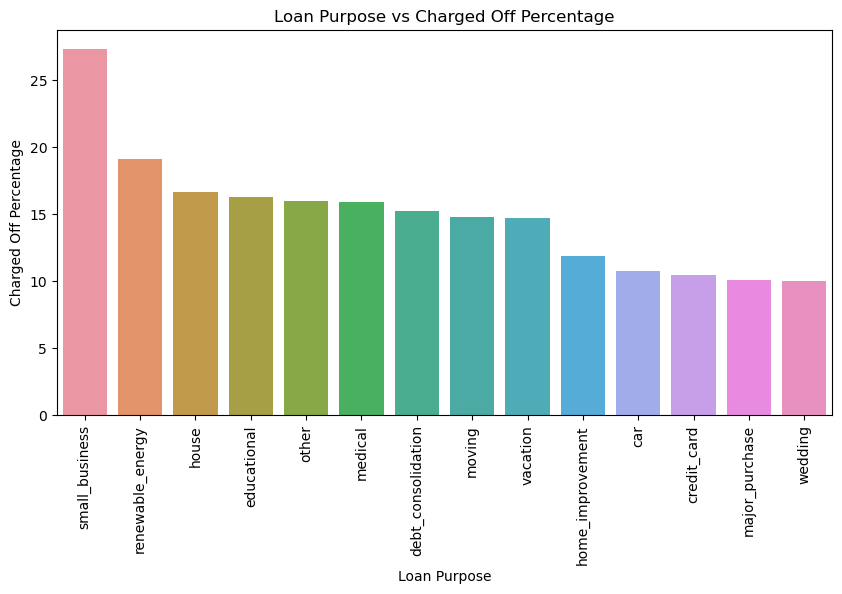

In [43]:
plt = reload(plt)

plt.figure(figsize = (10, 5))
sns.barplot(x = df['purpose'], y = df['charged_off_per(%)'])
plt.title('Loan Purpose vs Charged Off Percentage')
plt.ylabel('Charged Off Percentage')
plt.xlabel('Loan Purpose')
plt.xticks(rotation = 90)

plt.show()

#### 3. Analysis on  Loan Grade vs Charged Off Percentage
Below bar charts shows:
* People who belongs from grade **F and G** are **most likely to 'charged off'**.
* People who belongs from grade **A** are **less likely to 'charged off'**.

In [44]:
basis_of_segmentation = ['grade', 'loan_status']

df = data.groupby(by = basis_of_segmentation)['loan_status'].count().unstack().fillna(0).reset_index()

df['total'] = df['Charged Off']  + df['Fully Paid']
df['charged_off_per(%)'] = (df['Charged Off'] / df['total']) * 100

df

loan_status,grade,Charged Off,Fully Paid,total,charged_off_per(%)
0,A,551,8835,9386,5.870445
1,B,1308,9631,10939,11.957217
2,C,1245,6092,7337,16.968788
3,D,1039,3720,4759,21.832318
4,E,672,1832,2504,26.837061
5,F,297,607,904,32.853982
6,G,96,185,281,34.163701


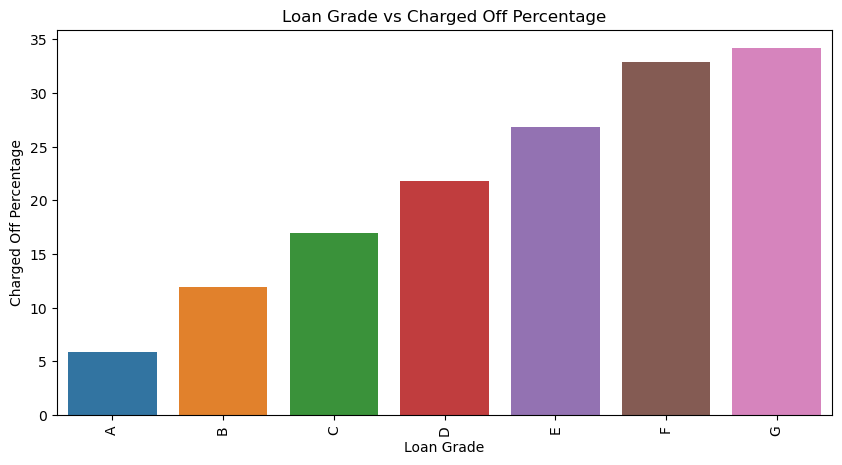

In [45]:
plt = reload(plt)

plt.figure(figsize = (10, 5))
sns.barplot(x = df['grade'], y = df['charged_off_per(%)'])
plt.title('Loan Grade vs Charged Off Percentage')
plt.ylabel('Charged Off Percentage')
plt.xlabel('Loan Grade')
plt.xticks(rotation = 90)

plt.show()

#### 4. Analysis on  Address State vs Charged Off Percentage
Below bar charts shows:
* People who belong from state **NV, TN and AK** are **most likely to 'charged off'**.
* People who belong from state **IN, ID and IA** are **less likely to 'charged off'**.

In [46]:
basis_of_segmentation = ['addr_state', 'loan_status']

df = data.groupby(by = basis_of_segmentation)['loan_status'].count().unstack().fillna(0).reset_index()

df['total'] = df['Charged Off']  + df['Fully Paid']
df['charged_off_per(%)'] = (df['Charged Off'] / df['total']) * 100
df = df.sort_values('charged_off_per(%)', ascending=False)

df

loan_status,addr_state,Charged Off,Fully Paid,total,charged_off_per(%)
31,NV,99.0,356.0,455.0,21.758242
40,TN,2.0,8.0,10.0,20.000000
0,AK,14.0,59.0,73.0,19.178082
39,SD,11.0,49.0,60.0,18.333333
9,FL,456.0,2137.0,2593.0,17.585808
11,HI,28.0,133.0,161.0,17.391304
30,NM,29.0,140.0,169.0,17.159763
35,OR,69.0,345.0,414.0,16.666667
23,MO,105.0,527.0,632.0,16.613924
10,GA,202.0,1072.0,1274.0,15.855573


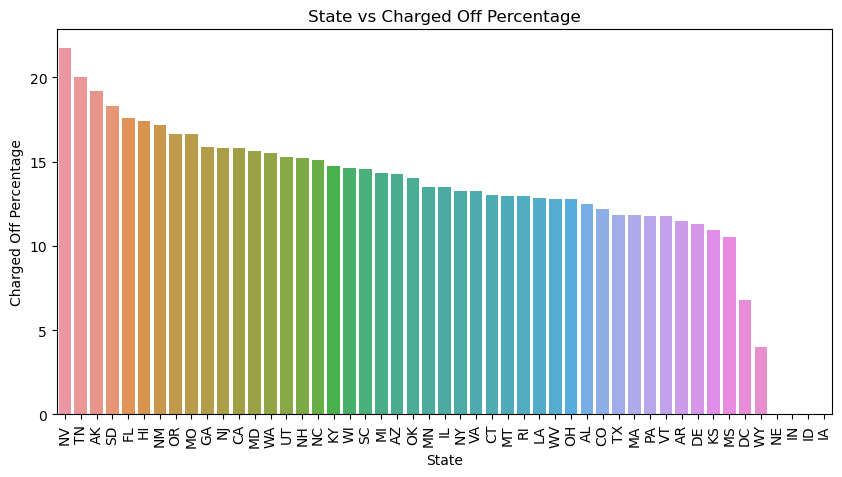

In [47]:
plt = reload(plt)

plt.figure(figsize = (10, 5))
sns.barplot(x = df['addr_state'], y = df['charged_off_per(%)'])
plt.title('State vs Charged Off Percentage')
plt.ylabel('Charged Off Percentage')
plt.xlabel('State')
plt.xticks(rotation = 90)

plt.show()

#### 5. Analysis on  Debt to Income Ratio vs Charged Off Percentage
Below bar charts shows:
* Higher the debt to income ratio, higher the chance of defaulter.

In [48]:
data['dti_cat'] = pd.cut(data['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '5-10', '10-15', '15-20', '25+'])
basis_of_segmentation = ['dti_cat', 'loan_status']

df = data.groupby(by = basis_of_segmentation)['loan_status'].count().unstack().fillna(0).reset_index()

df['total'] = df['Charged Off']  + df['Fully Paid']
df['charged_off_per(%)'] = (df['Charged Off'] / df['total']) * 100
df = df.sort_values('charged_off_per(%)', ascending=False)

df

loan_status,dti_cat,Charged Off,Fully Paid,total,charged_off_per(%)
4,25+,1048,5255,6303,16.627003
3,15-20,1297,7084,8381,15.475480
2,10-15,1305,7771,9076,14.378581
1,5-10,914,6330,7244,12.617338
0,0-5,541,3823,4364,12.396884


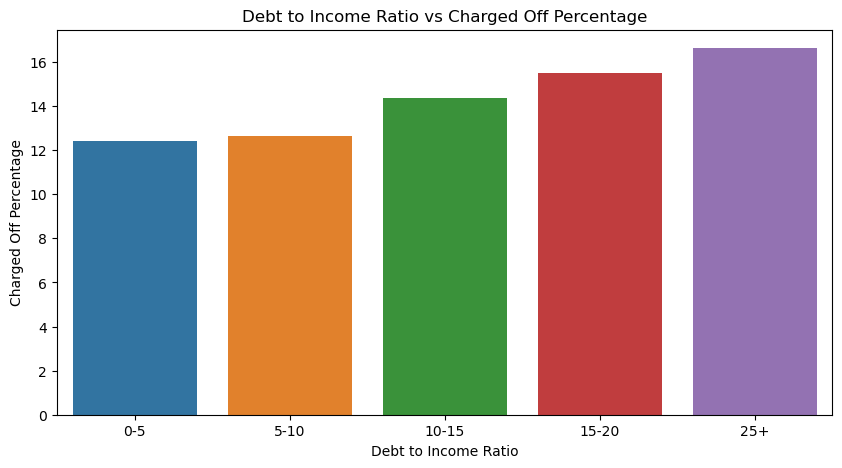

In [49]:
plt = reload(plt)

plt.figure(figsize = (10, 5))
sns.barplot(x = df['dti_cat'], y = df['charged_off_per(%)'])
plt.title('Debt to Income Ratio vs Charged Off Percentage')
plt.ylabel('Charged Off Percentage')
plt.xlabel('Debt to Income Ratio')

plt.show()

#### 6. Analysis on  Year vs Charged Off Percentage
Below bar charts shows:
* From year 2007 to 2009, the defaulter rate is decreasing.
* From 2009 to 2011, the defaulter rate is increasing.

In [50]:
basis_of_segmentation = ['issue_year', 'loan_status']

df = data.groupby(by = basis_of_segmentation)['loan_status'].count().unstack().fillna(0).reset_index()

df['total'] = df['Charged Off']  + df['Fully Paid']
df['charged_off_per(%)'] = (df['Charged Off'] / df['total']) * 100
df = df.sort_values('charged_off_per(%)', ascending=False)

df

loan_status,issue_year,Charged Off,Fully Paid,total,charged_off_per(%)
0,2007,2,5,7,28.571429
4,2011,3071,16323,19394,15.834794
1,2008,170,928,1098,15.482696
2,2009,583,4026,4609,12.649165
3,2010,1382,9620,11002,12.561352


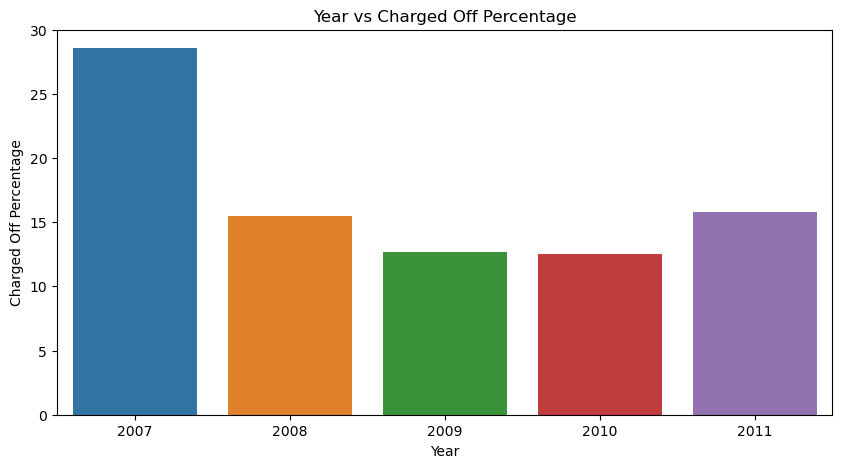

In [51]:
plt = reload(plt)

plt.figure(figsize = (10, 5))
sns.barplot(x = df['issue_year'], y = df['charged_off_per(%)'])
plt.title('Year vs Charged Off Percentage')
plt.ylabel('Charged Off Percentage')
plt.xlabel('Year')

plt.show()

# Bivariate analysis

#### 1. Analyse on Interest Rate vs Revolving Balance
Below scatter plot between interest rate and revolving balance shows that loan applicants who have **loan of low interest rate are likely to unpaid their amount at the end of their billing cycle(the revolving balance is high)**, compared to loan applicants who have loan of high interest rate.

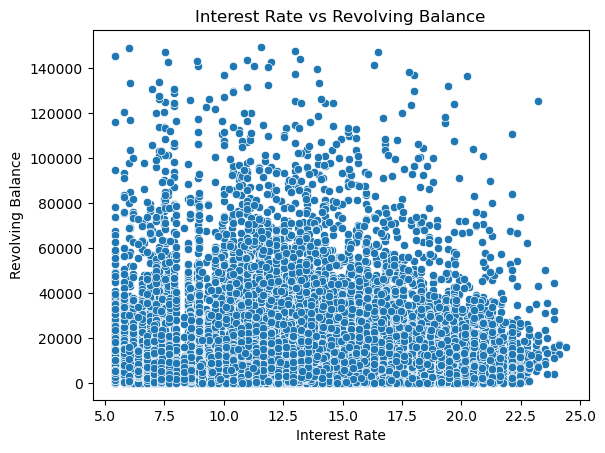

In [52]:
plt = reload(plt)
sns.scatterplot(x = data['int_rate'], y = data['revol_bal'])
plt.title('Interest Rate vs Revolving Balance')
plt.xlabel('Interest Rate')
plt.ylabel('Revolving Balance')
plt.show()

#### 2. Analyse on Annual Income vs Revolving Balance
Below scatter plot between annual income and revolving balance shows that loan applicants who have **high annual income are likely to unpaid their amount at the end of their billing cycle(the revolving balance is high)**, compared to loan applicants who have low annual income.

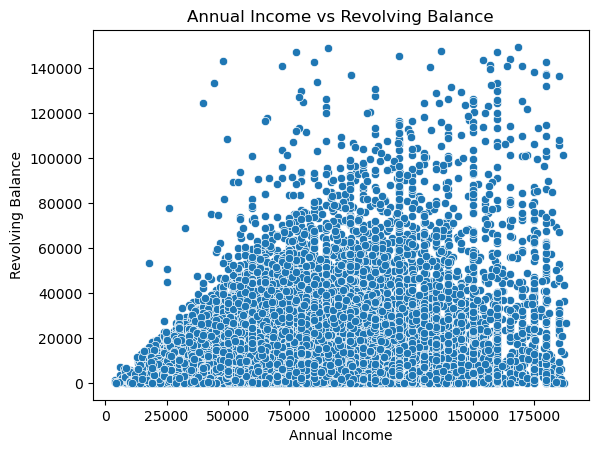

In [53]:
plt = reload(plt)
sns.scatterplot(x = data['annual_inc'], y = data['revol_bal'])
plt.title('Annual Income vs Revolving Balance')
plt.xlabel('Annual Income')
plt.ylabel('Revolving Balance')
plt.show()

#### 3. Analyse on Annual Income vs Installment
Below scatter plot between annual income and revolving balance shows that loan applicants who have **high annual income are giving high installments**, compared to loan applicants who have low annual income.

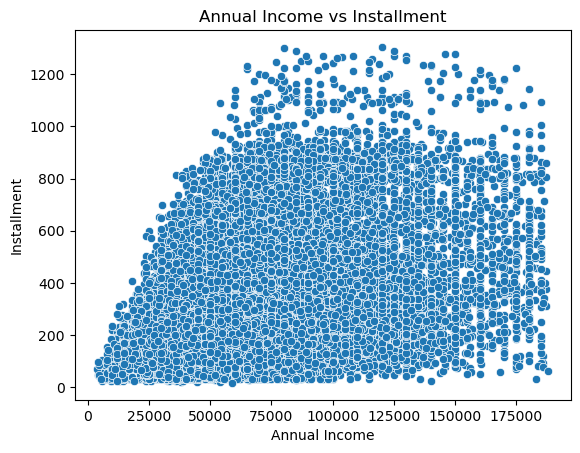

In [54]:
plt = reload(plt)
sns.scatterplot(x = data['annual_inc'], y = data['installment'])
plt.title('Annual Income vs Installment')
plt.xlabel('Annual Income')
plt.ylabel('Installment')
plt.show()

#### 4. Analyse on Annual Income vs Loan Amount
Below scatter plot between annual income and loan amount shows that loan applicants who have **high annual income are taking bigger loan**, compared to loan applicants who have low annual income.

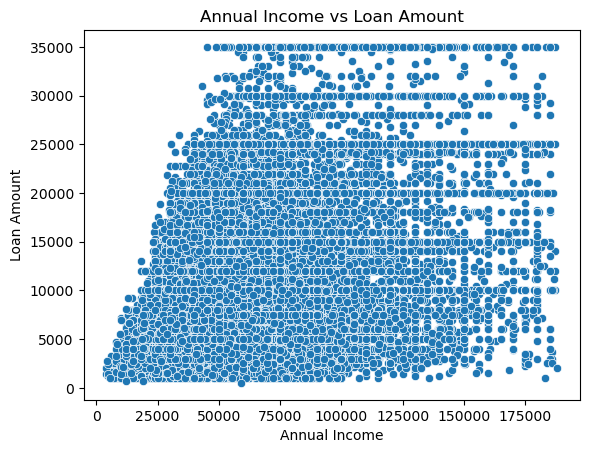

In [55]:
plt = reload(plt)
sns.scatterplot(x = data['annual_inc'], y = data['loan_amnt'])
plt.title('Annual Income vs Loan Amount')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()

#### 5. Analysis on Loan Status vs Annual Income
Below box plot comparison shows that 
* The **loan applicants who are "charged off" having less income than "fully paid" applicants.**

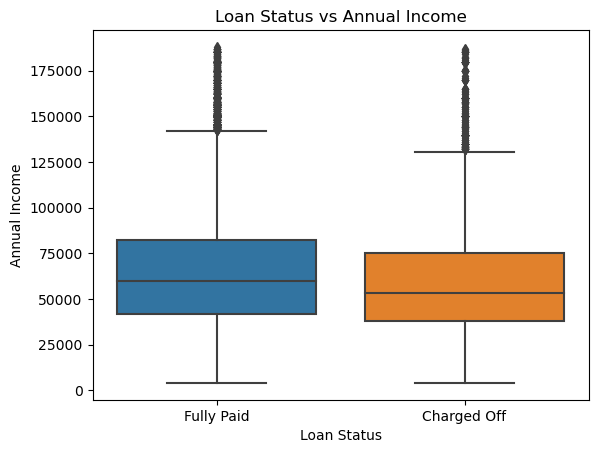

In [56]:
plt = reload(plt)
sns.boxplot(x = data['loan_status'], y = data['annual_inc'])
plt.title('Loan Status vs Annual Income')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.show()

#### 6. Analysis on Loan Status vs Interest Rate
Below box plot comparison shows that 
* The **loan applicants who are "charged off" having high loan interest rate than "fully paid" applicants.**

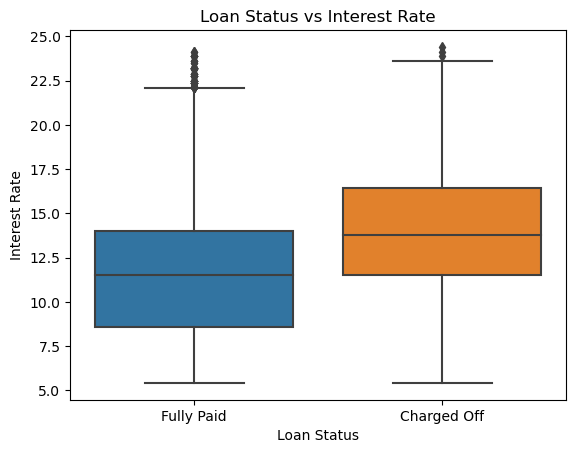

In [57]:
plt = reload(plt)
sns.boxplot(x = data['loan_status'], y = data['int_rate'])
plt.title('Loan Status vs Interest Rate')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.show()

#### 7. Analysis on Loan Status vs Interest Rate
Below box plot comparison shows that 
* Charged off applicants are paying silightly large installment than fully paid people.

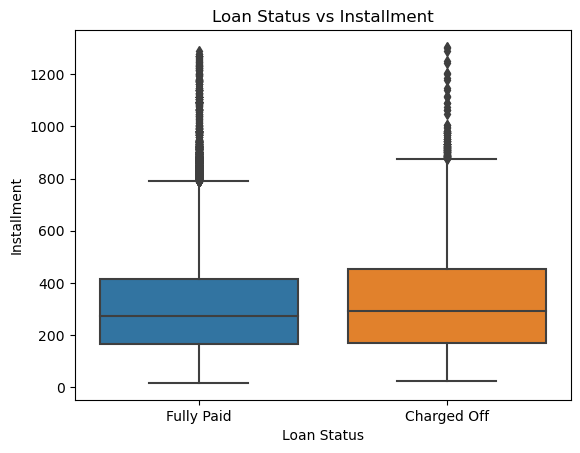

In [58]:
plt = reload(plt)
sns.boxplot(x = data['loan_status'], y = data['installment'])
plt.title('Loan Status vs Installment')
plt.xlabel('Loan Status')
plt.ylabel('Installment')
plt.show()

#### 8. Analysis on Loan Purpose vs Loan Amount
Below bar plot comparison shows that 
* **Majority** of loan amount is taken either for **small business or for house.**
* **Very few** loan amount is taken for **vacation**.

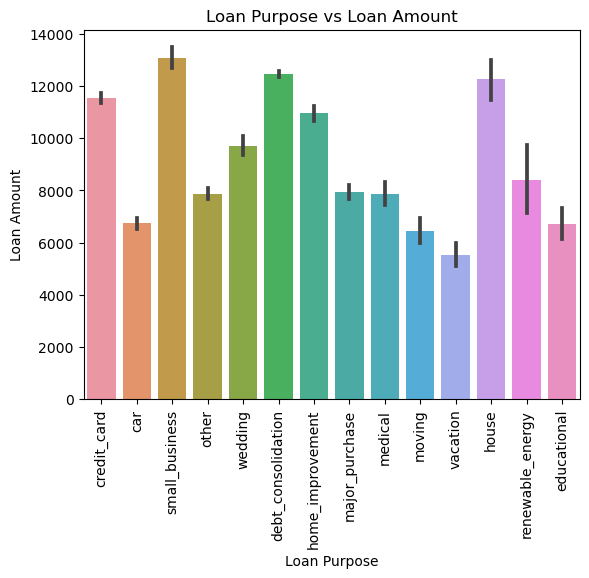

In [59]:
plt = reload(plt)
sns.barplot(x = data['purpose'], y = data['loan_amnt'])
plt.title('Loan Purpose vs Loan Amount')
plt.xlabel('Loan Purpose')
plt.ylabel('Loan Amount')
plt.xticks(rotation = 90)
plt.show()

#### 9. Analysis on Loan Term vs Loan Amount
Below box plot comparison shows that 
* Loan amount for **60 months term is greater** than loan amount for 36 months.


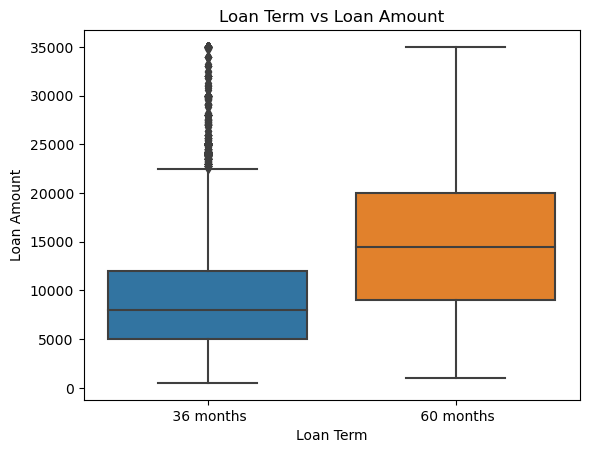

In [60]:
plt = reload(plt)
sns.boxplot(x = data['term'], y = data['loan_amnt'])
plt.title('Loan Term vs Loan Amount')
plt.xlabel('Loan Term')
plt.ylabel('Loan Amount')
plt.show()

#### 10. Analysis on Employment Length vs Loan Amount
Below bar plot comparison shows that 
* Loan applicants who have **more than 10 years** of working are taking **highest** amount of loan.
* Loan applicants who have **less than 1 year** of working are taking **lowest** amount of loan.

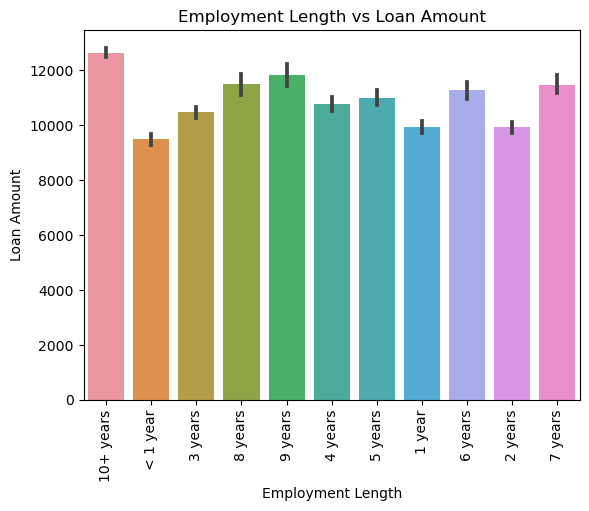

In [61]:
plt = reload(plt)
sns.barplot(x = data['emp_length'], y = data['loan_amnt'])
plt.title('Employment Length vs Loan Amount')
plt.xlabel('Employment Length')
plt.ylabel('Loan Amount')
plt.xticks(rotation = 90)
plt.show()

#### 11. Analysis on Home Ownership vs Loan Amount
Below box plot comparison shows that 
* Loan applicants who are **mortgage**, are taking **highest** amounnt of loan.

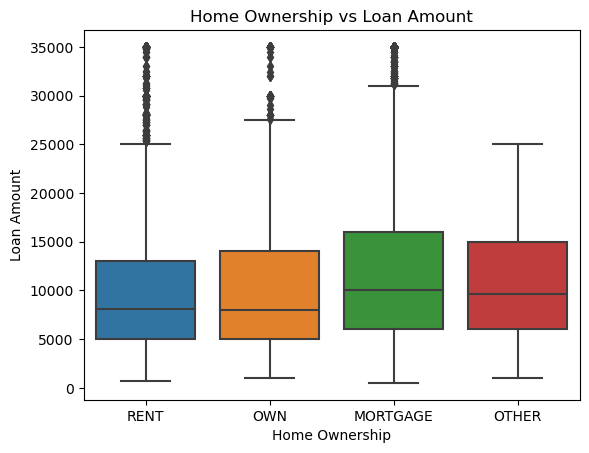

In [62]:
plt = reload(plt)
sns.boxplot(x = data['home_ownership'], y = data['loan_amnt'])
plt.title('Home Ownership vs Loan Amount')
plt.xlabel('Home Ownership')
plt.ylabel('Loan Amount')
plt.show()

#### 12. Analysis on Address State vs Loan Amount
Below bar plot comparison shows that 
* Loan applicants who belong from **state ID, AK** are taking **highest** amont of loan.
* Loan applicants who belong from **state IN** are taking **lowest** amount loan.

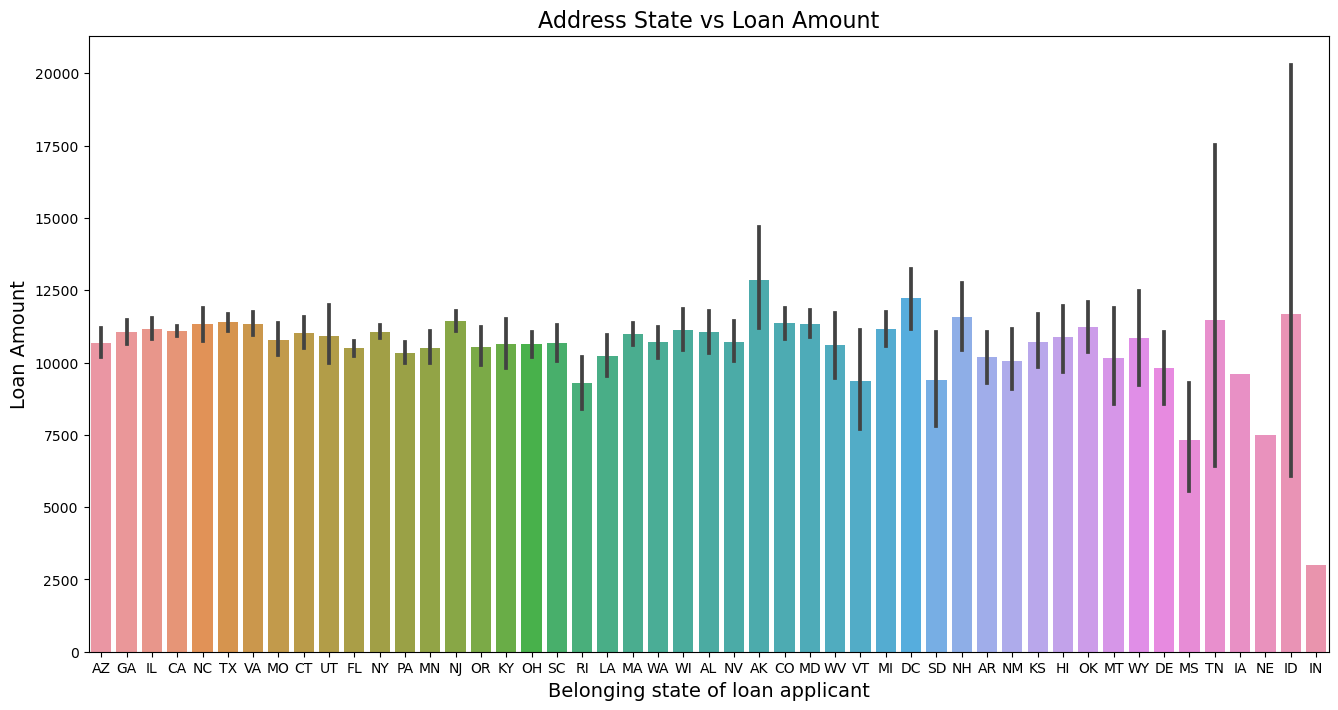

In [63]:
plt = reload(plt)
plt.figure(figsize = (16, 8))
sns.barplot(x = data['addr_state'], y = data['loan_amnt'])
plt.xlabel('Belonging state of loan applicant', fontsize=14)
plt.ylabel('Loan Amount', fontsize=14)
plt.title('Address State vs Loan Amount', fontsize=16)
plt.show()

#### 13. Analysis on Public Record Bankrupticies vs Loan Amount
Below bar plot comparison shows that 
* Loan applicants who have **0 bankrupticies** are taking **highest** amount of loan.

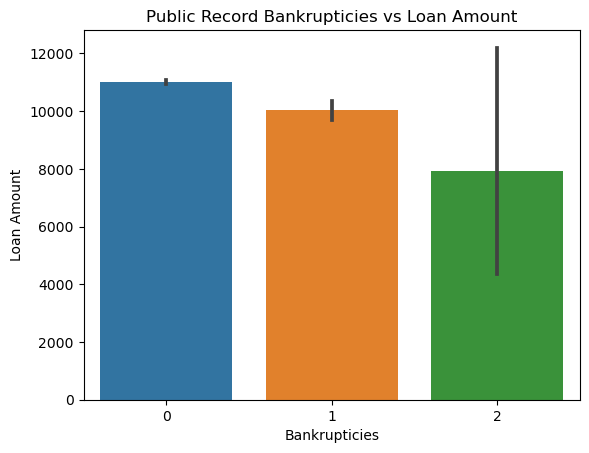

In [64]:
plt = reload(plt)
sns.barplot(x = data['pub_rec_bankruptcies'], y = data['loan_amnt'])
plt.title('Public Record Bankrupticies vs Loan Amount')
plt.xlabel('Bankrupticies')
plt.ylabel('Loan Amount')
plt.show()

#### 14. Analysis on Loan Status vs Public Record Bankrupticies
Below bar plot comparison shows that 
* Loan applicants who are **charged-off** are **bankrupt**.

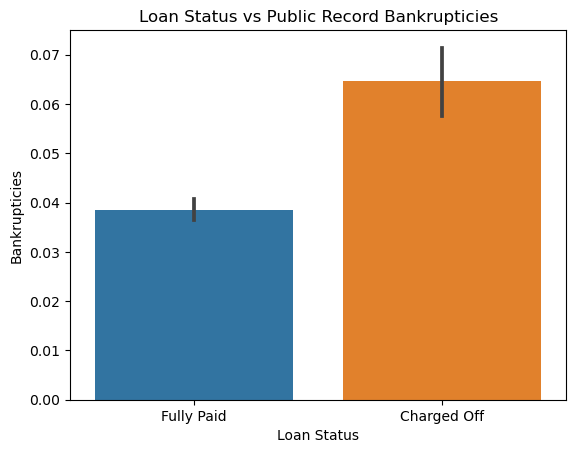

In [65]:
plt = reload(plt)
sns.barplot(x = data['loan_status'], y = data['pub_rec_bankruptcies'])
plt.title('Loan Status vs Public Record Bankrupticies')
plt.ylabel('Bankrupticies')
plt.xlabel('Loan Status')
plt.show()

#### 15. Analysis on Employment Length vs Public Record Bankrupticies
Below bar plot comparison shows that 
* Loan applicants who have **10+ years of employment length** are mostly **bankrupt**.

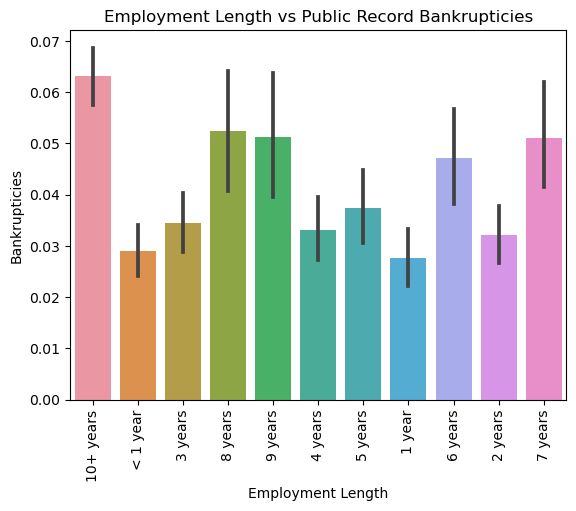

In [66]:
plt = reload(plt)
sns.barplot(x = data['emp_length'], y = data['pub_rec_bankruptcies'])
plt.title('Employment Length vs Public Record Bankrupticies')
plt.ylabel('Bankrupticies')
plt.xlabel('Employment Length')
plt.xticks(rotation = 90)
plt.show()

#### 16. Analysis on LC Verification vs Public Record Bankrupticies
Below bar plot comparison shows that 
* Loan applicants whose employment source are **not verified by LC** are mostly **bankrupt**.

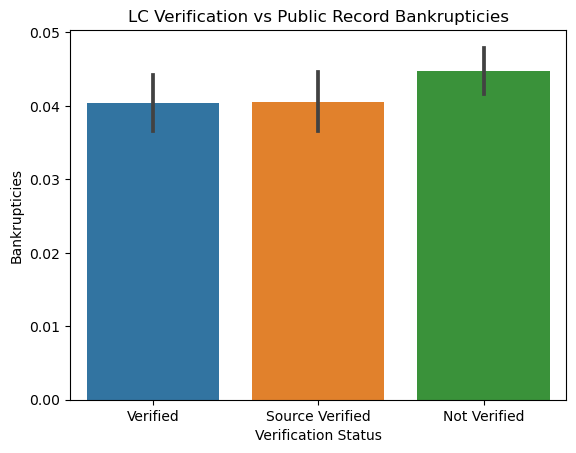

In [67]:
plt = reload(plt)
sns.barplot(x = data['verification_status'], y = data['pub_rec_bankruptcies'])
plt.title('LC Verification vs Public Record Bankrupticies')
plt.ylabel('Bankrupticies')
plt.xlabel('Verification Status')
plt.show()

# Multivariate Analysis
Below heatmap shows
* **Loan amount and Funded amount** are **highly co-related.**
* **Annual income and Interest rate** are **less co-related.**
* **Annual income and debt to income ratio** are **negatively co-related.**

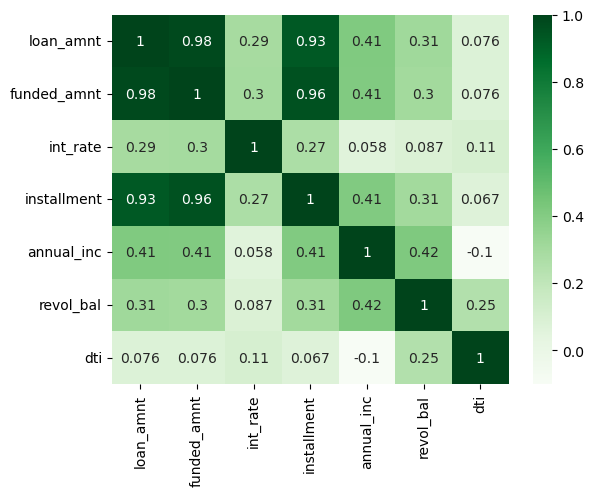

In [68]:
sns.heatmap(data[numeric_columns].corr(), annot = True, cmap = 'Greens')
plt.show()